In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

In [2]:
df = pd.read_csv('datasets/bbc_text_cls.csv')

In [3]:
df.head()

,text,labels
0,Ad sales boost Time Warner profit\n\nQuarterly...,business
1,Dollar gains on Greenspan speech\n\nThe dollar...,business
2,Yukos unit buyer faces loan claim\n\nThe owner...,business
3,High fuel prices hit BA's profits\n\nBritish A...,business
4,Pernod takeover talk lifts Domecq\n\nShares in...,business


In [4]:
# Map classes to integers from 0 to K-1.
df['targets'] = df['labels'].astype("category").cat.codes

In [5]:
df.head()

,text,labels,targets
0,Ad sales boost Time Warner profit\n\nQuarterly...,business,0
1,Dollar gains on Greenspan speech\n\nThe dollar...,business,0
2,Yukos unit buyer faces loan claim\n\nThe owner...,business,0
3,High fuel prices hit BA's profits\n\nBritish A...,business,0
4,Pernod takeover talk lifts Domecq\n\nShares in...,business,0


In [6]:
X = df['text']
y = df['targets']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

In [8]:
vectorizer = TfidfVectorizer(stop_words='english')
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [9]:
# Number of classes
K = df['targets'].max() + 1
K

5

In [10]:
# Input dimension
D = X_train.shape[1]

In [11]:
# Build the model
i = Input(shape = (D,))
x = Dense(300, activation='relu')(i)
x = Dense(K)(x) #Softmax included in loss

model = Model(i, x)

In [12]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 26738)]           0         
                                                                 
 dense (Dense)               (None, 300)               8021700   
                                                                 
 dense_1 (Dense)             (None, 5)                 1505      
                                                                 
Total params: 8023205 (30.61 MB)
Trainable params: 8023205 (30.61 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [13]:
model.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer = 'adam',
    metrics = ['accuracy']
)

In [14]:
X_train = X_train.toarray()
X_test = X_test.toarray()

In [15]:
r = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=32,
    epochs=10
)

Epoch 1/10


56/56 [==============================] - 6s 89ms/step - loss: 1.0224 - accuracy: 0.9090 - val_loss: 0.3826 - val_accuracy: 0.9708
Epoch 2/10
56/56 [==============================] - 5s 83ms/step - loss: 0.1360 - accuracy: 0.9989 - val_loss: 0.1437 - val_accuracy: 0.9708
Epoch 3/10
56/56 [==============================] - 5s 84ms/step - loss: 0.0311 - accuracy: 0.9994 - val_loss: 0.1115 - val_accuracy: 0.9708
Epoch 4/10
56/56 [==============================] - 7s 118ms/step - loss: 0.0142 - accuracy: 1.0000 - val_loss: 0.0996 - val_accuracy: 0.9708
Epoch 5/10
56/56 [==============================] - 6s 98ms/step - loss: 0.0085 - accuracy: 1.0000 - val_loss: 0.0927 - val_accuracy: 0.9708
Epoch 6/10
56/56 [==============================] - 5s 93ms/step - loss: 0.0058 - accuracy: 1.0000 - val_loss: 0.0888 - val_accuracy: 0.9708
Epoch 7/10
56/56 [==============================] - 6s 103ms/step - loss: 0.0042 - accuracy: 1.0000 - val_loss: 0.0863 - val_accuracy: 0.9708
Epoch 8/1

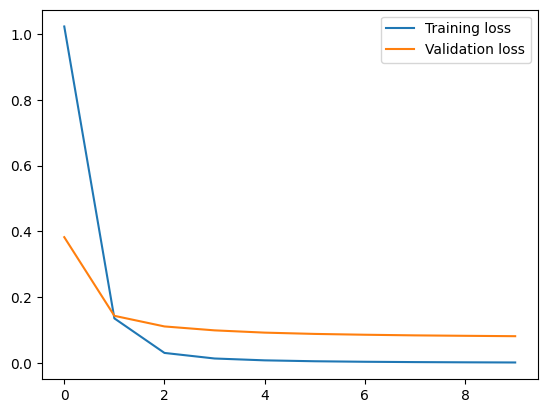

In [16]:
# Plot loss per iteration
plt.plot(r.history['loss'], label='Training loss')
plt.plot(r.history['val_loss'], label='Validation loss')
plt.legend();

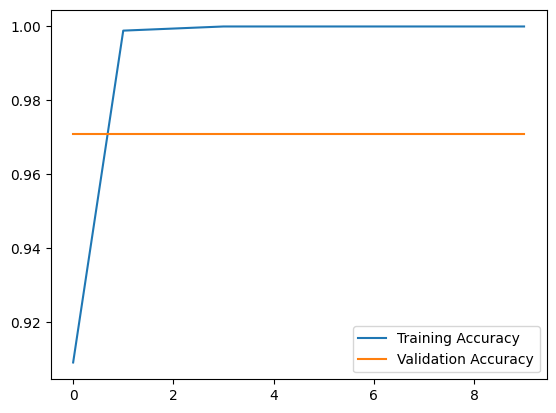

In [19]:
# Plot loss per iteration
plt.plot(r.history['accuracy'], label='Training Accuracy')
plt.plot(r.history['val_accuracy'], label='Validation Accuracy')
plt.legend();

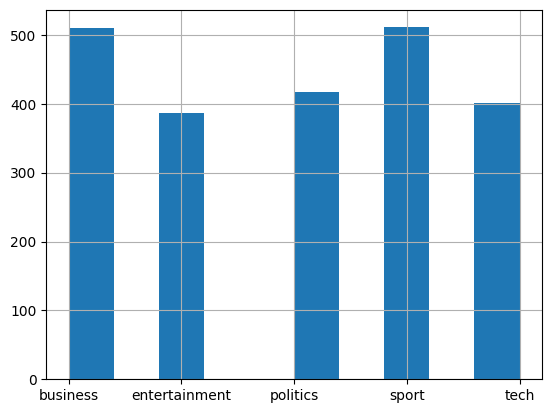

In [18]:
df['labels'].hist();